## Crop
The idea of this notebook is to crop out a reactangular region of the masks for later classification. The following simplifications are done, which could also be relaxed:

* Currently for each image the largest tumour region is taken.
* Only tumors are taken into account
* A recatangular region is cut out keeping the aspect ratio, it is then scaled to 48x48
* Sometimes this results in out of bound regions, these cases are ignored for the time being.

In [42]:
SHAPE = (48,48)

import pickle
import gzip
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import time

In [35]:
#fileName = '/home/dueo/data/Inselspital_2015_07_08/GBM.pickle'
fileName = 'GBM_sub.pickle'
with open(fileName) as f:
    Names,X,Y,l = pickle.load(f)
tumor_label = np.max(Y)

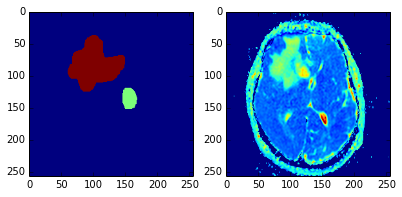

In [37]:
%matplotlib inline
import pylab
idx = 1
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplot(131)
plt.imshow(Y[idx,0,:,:])
plt.subplot(132)
plt.imshow(X[idx,0,:,:])

In [4]:
from scipy import ndimage

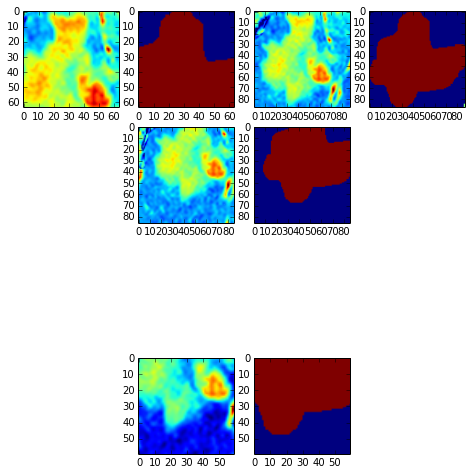

In [39]:
# Some code taken from: http://scipy-lectures.github.io/advanced/image_processing/
def getLargestTumor(img):
    img[img == 1] = 0
    mask, num = ndimage.label(img)
    sizes = ndimage.sum(img, mask, range(num + 1))
    #plt.imshow(mask)
    maxCluster = np.argmax(sizes)
    if (maxCluster == 0):
        return None
    slice_x, slice_y = ndimage.find_objects(mask == maxCluster)[0]


    # Cropping the largest region 
    x_r = slice_x.stop - slice_x.start
    y_r = slice_y.stop - slice_y.start
    m = max(x_r,y_r)

    x_c = (slice_x.stop + slice_x.start) * 0.5
    y_c = (slice_y.stop + slice_y.start) * 0.5
    slice_x_new = slice(x_c - m/2, x_c + m/2)
    slice_y_new = slice(y_c - m/2, y_c + m/2)

    return [X[idx,0,slice_x_new, slice_y_new],
            Y[idx,0,slice_x_new, slice_y_new]]


for i in range(0,9):
    res = None
    try:
        res = getLargestTumor(np.copy(Y[i,0,:,:]))
        if (res != None):
            plt.subplot(5,5,2*i+1)
            plt.imshow(res[0])
            plt.subplot(5,5,2*i+2)
            plt.imshow(res[1])
    except IndexError:
        pass

In [45]:
numFiles = len(X)  # For Metastasis
X_out = np.zeros((numFiles,1,SHAPE[0], SHAPE[1])) #Change after all slices have been found
Y_out = np.zeros(numFiles)
Names_out = [None] * numFiles
allSlices = 0 
for i in range(0, numFiles):
    res = None
    try:
        res = getLargestTumor(np.copy(Y[i,0,:,:]))
        if (res != None):
            img = res[0]
            dd = img
            ##dd = cv2.resize(img,(48, 48))
            ##plt.imshow(dd)
            ##plt.subplot(4,4,2*i+2)
            ##plt.imshow(res[1])
            X_out[allSlices,] = dd 
            Y_out[allSlices] = tumor_label
            Names_out[allSlices] = Names[i]
            allSlices += 1
    except IndexError:
        pass

ValueError: could not broadcast input array from shape (64,64) into shape (1,48,48)

AttributeError: 'module' object has no attribute 'imread'